## Load and Preview Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv("../1_datasets/final_dataset.csv")
df.head()

,ISO,Year,math_proficiency,completion_rate,gov_edu_spending,out_of_school_rate,trained_teacher_ratio,digital_connectivity,school_closure_days,income_group
0,ALB,2019,61.75,97.3,3.92,3.0,NaN,NaN,201.0,Upper middle income
1,ALB,2023,68.00,97.4,2.92,10.0,NaN,NaN,201.0,Upper middle income
2,ARE,2019,53.42,NaN,3.86,2.0,18.60,NaN,463.0,High income
3,ARE,2023,60.00,NaN,NaN,1.0,14.83,NaN,463.0,High income
4,ARG,2019,13.10,96.3,4.77,1.0,NaN,0.39,575.0,Upper middle income


In [21]:
print(df.columns.tolist())


['ISO', 'Year', 'math_proficiency', 'completion_rate', 'gov_edu_spending', 'out_of_school_rate', 'trained_teacher_ratio', 'digital_connectivity', 'school_closure_days', 'income_group']


## Reshape Data for Change Analysis

In [3]:
from functools import reduce

# Select key indicators to analyze (with 2019 and 2023 values)
indicators = ['math_proficiency', 'completion_rate', 'trained_teacher_ratio', 'out_of_school_rate', 'gov_edu_spending']
pivoted_dfs = []
for var in indicators:
    pivot = df.pivot_table(index='ISO', columns='Year', values=var, aggfunc='mean').reset_index()
    pivot.columns.name = None
    pivot = pivot.rename(columns={2019: f'{var}_2019', 2023: f'{var}_2023'})
    pivoted_dfs.append(pivot)

# Merge all main indicators
merged = reduce(lambda left, right: pd.merge(left, right, on='ISO'), pivoted_dfs)

# Drop rows with missing values in key indicators
merged = merged.dropna()

# Calculate changes
merged['math_change'] = merged['math_proficiency_2023'] - merged['math_proficiency_2019']
merged['completion_change'] = merged['completion_rate_2023'] - merged['completion_rate_2019']
merged['teacher_change'] = merged['trained_teacher_ratio_2023'] - merged['trained_teacher_ratio_2019']
merged['out_of_school_change'] = merged['out_of_school_rate_2023'] - merged['out_of_school_rate_2019']
merged['gov_change'] = merged['gov_edu_spending_2023'] - merged['gov_edu_spending_2019']

# Get unique digital connectivity values per country (ignore year)
connectivity = df[['ISO', 'digital_connectivity']].dropna().drop_duplicates(subset='ISO')

# Get unique school closure days per country (ignore year)
closures = df[['ISO', 'school_closure_days']].dropna().drop_duplicates(subset='ISO')

# Merge both columns into the main merged dataset
merged = merged.merge(connectivity, on='ISO', how='left')
merged = merged.merge(closures, on='ISO', how='left')

# Get unique income group per country (ignore year)
income_group = df[['ISO', 'income_group']].dropna().drop_duplicates(subset='ISO')

# Merge income group into the merged dataset
merged = merged.merge(income_group, on='ISO', how='left')


merged.head()


,ISO,math_proficiency_2019,math_proficiency_2023,completion_rate_2019,completion_rate_2023,trained_teacher_ratio_2019,trained_teacher_ratio_2023,out_of_school_rate_2019,out_of_school_rate_2023,gov_edu_spending_2019,gov_edu_spending_2023,math_change,completion_change,teacher_change,out_of_school_change,gov_change,digital_connectivity,school_closure_days,income_group
0,ARM,26.495000,26.520000,99.4,99.5,29.07,23.65,10.0,8.0,2.57,2.43,0.025000,0.1,-5.42,-2.0,-0.14,0.81,87.0,Upper middle income
1,AZE,24.680000,22.387500,98.3,98.4,15.79,15.97,8.0,9.0,3.18,3.58,-2.292500,0.1,0.18,1.0,0.40,NaN,342.0,Upper middle income
2,BFA,26.982500,26.246667,60.6,68.9,44.47,37.41,33.0,36.0,5.46,5.33,-0.735833,8.3,-7.06,3.0,-0.13,0.01,111.0,Low income
3,BLR,9.170000,9.723333,99.8,99.8,19.53,20.22,3.0,4.0,4.98,4.95,0.553333,0.0,0.69,1.0,-0.03,NaN,NaN,Upper middle income
4,BLZ,11.103333,12.100000,83.1,85.2,23.35,20.04,4.0,12.0,5.96,4.26,0.996667,2.1,-3.31,8.0,-1.70,NaN,522.0,Upper middle income


## Calculate Change in Indicators (2023 - 2019)

In [18]:
merged['math_change'] = merged['math_proficiency_2023'] - merged['math_proficiency_2019']
merged['completion_change'] = merged['completion_rate_2023'] - merged['completion_rate_2019']
merged['teacher_change'] = merged['trained_teacher_ratio_2023'] - merged['trained_teacher_ratio_2019']
merged['out_of_school_change'] = merged['out_of_school_rate_2023'] - merged['out_of_school_rate_2019']
merged['gov_change'] = merged['gov_edu_spending_2023'] - merged['gov_edu_spending_2019']
merged.head()

,ISO,math_proficiency_2019,math_proficiency_2023,completion_rate_2019,completion_rate_2023,trained_teacher_ratio_2019,trained_teacher_ratio_2023,out_of_school_rate_2019,out_of_school_rate_2023,gov_edu_spending_2019,gov_edu_spending_2023,math_change,completion_change,teacher_change,out_of_school_change,gov_change,digital_connectivity,school_closure_days,income_group
0,ARM,26.495000,26.520000,99.4,99.5,29.07,23.65,10.0,8.0,2.57,2.43,0.025000,0.1,-5.42,-2.0,-0.14,0.81,87.0,Upper middle income
1,AZE,24.680000,22.387500,98.3,98.4,15.79,15.97,8.0,9.0,3.18,3.58,-2.292500,0.1,0.18,1.0,0.40,NaN,342.0,Upper middle income
2,BFA,26.982500,26.246667,60.6,68.9,44.47,37.41,33.0,36.0,5.46,5.33,-0.735833,8.3,-7.06,3.0,-0.13,0.01,111.0,Low income
3,BLR,9.170000,9.723333,99.8,99.8,19.53,20.22,3.0,4.0,4.98,4.95,0.553333,0.0,0.69,1.0,-0.03,NaN,NaN,Upper middle income
4,BLZ,11.103333,12.100000,83.1,85.2,23.35,20.04,4.0,12.0,5.96,4.26,0.996667,2.1,-3.31,8.0,-1.70,NaN,522.0,Upper middle income


##  Correlation Between Changes in Key Education Indicators

This heatmap displays the pairwise **Pearson correlation coefficients** between changes in key education indicators:

- `math_change`: Change in math proficiency (2023 vs 2019)
- `completion_change`: Change in school completion rate
- `teacher_change`: Change in trained teacher ratio
- `out_of_school_change`: Change in out-of-school rate
- `gov_change`: Change in government spending on education
- `digital_connectivity`: Level of school-age digital access
- `school_closure_days`: Total days of full and partial school closure

A positive correlation indicates that both variables tend to increase or decrease together, while a negative correlation suggests an inverse relationship.

This analysis helps identify which factors are most closely associated with learning loss or improvement across countries.


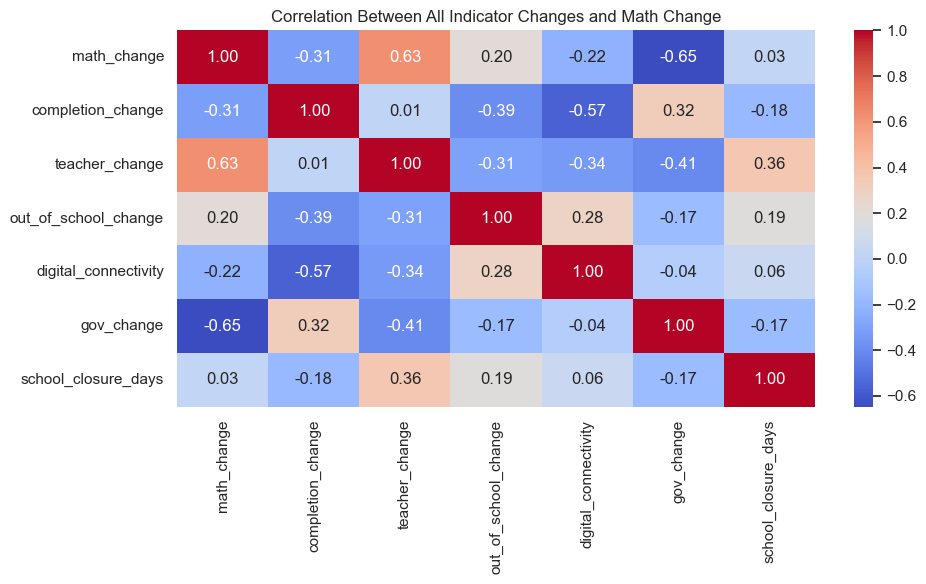

In [5]:
corr_vars = ['math_change', 'completion_change', 'teacher_change',
               'out_of_school_change', 'digital_connectivity',
               'gov_change', 'school_closure_days']
corr_matrix = merged[corr_vars].dropna().corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between All Indicator Changes and Math Change")
plt.tight_layout()
plt.show()

### Findings – Correlation Between Indicators and Math Proficiency Change
This heatmap shows how changes in different indicators are correlated with the change in math proficiency from 2019 to 2023.

Key observations:

- Negative correlation with `out_of_school_change`:
Countries where more students were out of school in 2023 tend to have larger drops in math proficiency. This supports the idea that lack of access to school heavily affects learning outcomes.

- Positive correlation with `digital_connectivity`:
Countries with higher school-age digital access showed smaller learning losses. This highlights the importance of remote learning infrastructure during school closures.

- Slight negative correlation with `school_closure_days`:
More school closure days are mildly associated with a drop in math performance, although the relationship is not very strong, possibly due to differences in how countries handled closures (full vs partial, with or without support).

- Weaker or no strong correlation with government spending and teacher ratio change, possibly due to delays in impact or variation in how resources were used.

These correlations don’t prove causation, but they help us understand which factors might be more strongly associated with pandemic learning loss in math.

## Linear Regression: Predicting Math Change from Indicator Changes
We use a simple linear regression model to assess how well changes in education indicators can predict changes in math proficiency.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define X and y
X = merged[['completion_change', 'teacher_change', 'out_of_school_change']]
y = merged['math_change']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Model Coefficients:", dict(zip(X.columns, model.coef_)))
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Coefficients: {'completion_change': 0.3074185216634653, 'teacher_change': 0.35302412961995194, 'out_of_school_change': 0.29078957603790373}
Intercept: -1.23
R² Score: -1.96
RMSE: 1.96


c:\Users\heba9\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation:**
- The regression model provides an estimate of how changes in each factor affect math proficiency.
- Coefficients represent the strength and direction of influence.
- R² indicates how much of the variation in math change is explained by the predictors.
- While this is a basic model, it offers initial evidence for potential causal links.

## Visualize: Actual vs Predicted Math Proficiency Change

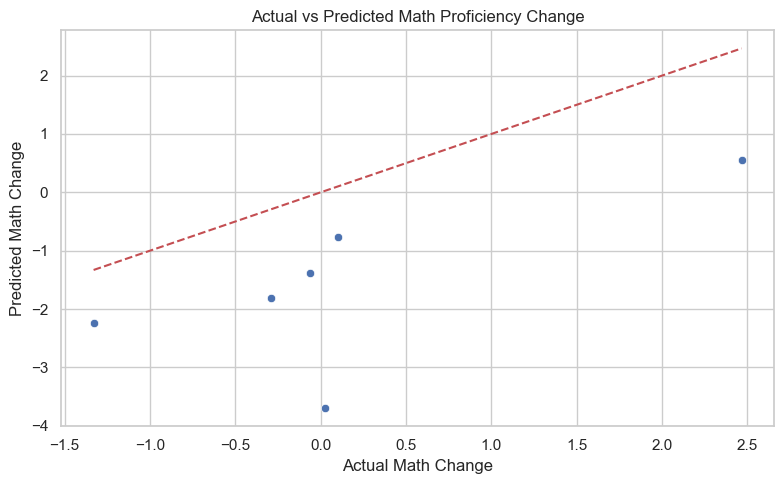

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Math Change")
plt.ylabel("Predicted Math Change")
plt.title("Actual vs Predicted Math Proficiency Change")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot compares the predicted values of math change with the actual observed values. Points closer to the red dashed line indicate better prediction accuracy.

## Regression by Income Group
We now train a separate linear regression model for each income group to assess how predictors perform differently across economic contexts.

In [8]:
import pprint
from sklearn.linear_model import LinearRegression
group_results = {}

for group in merged['income_group'].dropna().unique():
    subset = merged[merged['income_group'] == group]
    X = subset[['completion_change', 'teacher_change', 'out_of_school_change']]
    y = subset['math_change']

    if len(subset) >= 5:  # skip very small groups
        model = LinearRegression()
        model.fit(X, y)
        r2 = model.score(X, y)
        group_results[group] = {
            "R²": round(r2, 2),
            "coefficients": dict(zip(X.columns, model.coef_)),
            "intercept": round(model.intercept_, 2)
        }

pprint.pprint(group_results)

{'Lower middle income': {'R²': 0.61,
                         'coefficients': {'completion_change': 0.20730933373481783,
                                          'out_of_school_change': 0.2817053267426348,
                                          'teacher_change': 0.2917393236197124},
                         'intercept': 0.93},
 'Upper middle income': {'R²': 0.12,
                         'coefficients': {'completion_change': -0.4675435599755028,
                                          'out_of_school_change': 0.3539235316023924,
                                          'teacher_change': -0.20698858340403886},
                         'intercept': -2.19}}


Each group-level regression helps us understand whether the relationship between learning loss and explanatory variables changes based on the country's income classification. This can uncover important equity or access gaps.

##  Regression Plots: Math Proficiency Change vs. Key Factors by Income Group
The following regression plots visualize the relationship between **math proficiency change (2019–2023)** and various explanatory variables, separated by **country income group**. Each plot includes:

A regression line per income group
A horizontal reference line at zero change
A vertical reference line at zero (if the x-variable represents a change)
#### Variables examined:
- Completion Rate Change
- Teacher Ratio Change
- Out-of-School Rate Change
- Government Spending Change
- Digital Connectivity
- School Closure Days

  These plots help illustrate which indicators are most consistently associated with learning gains or losses across income groups.

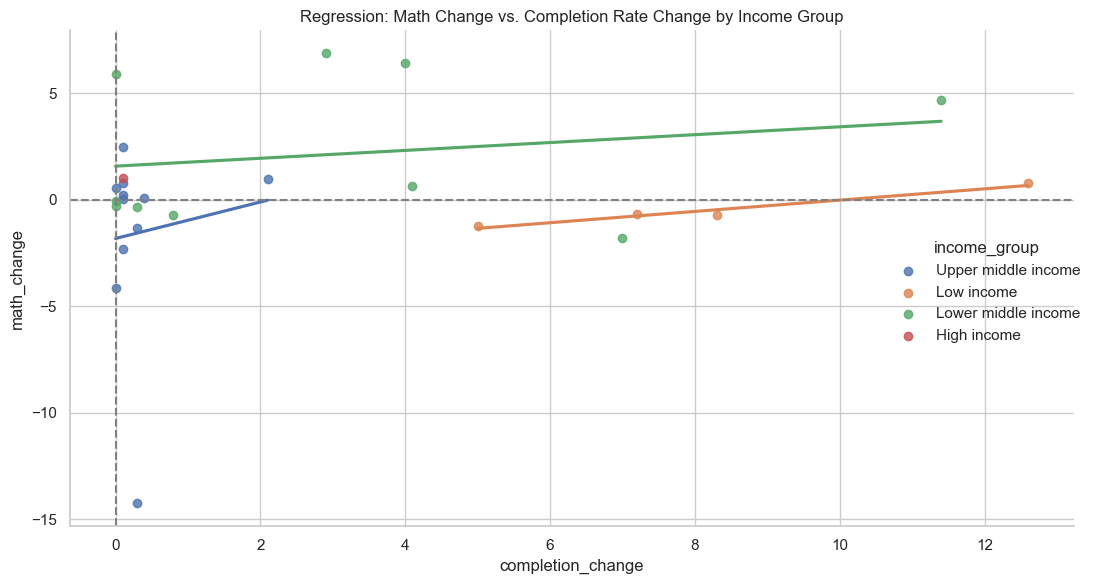

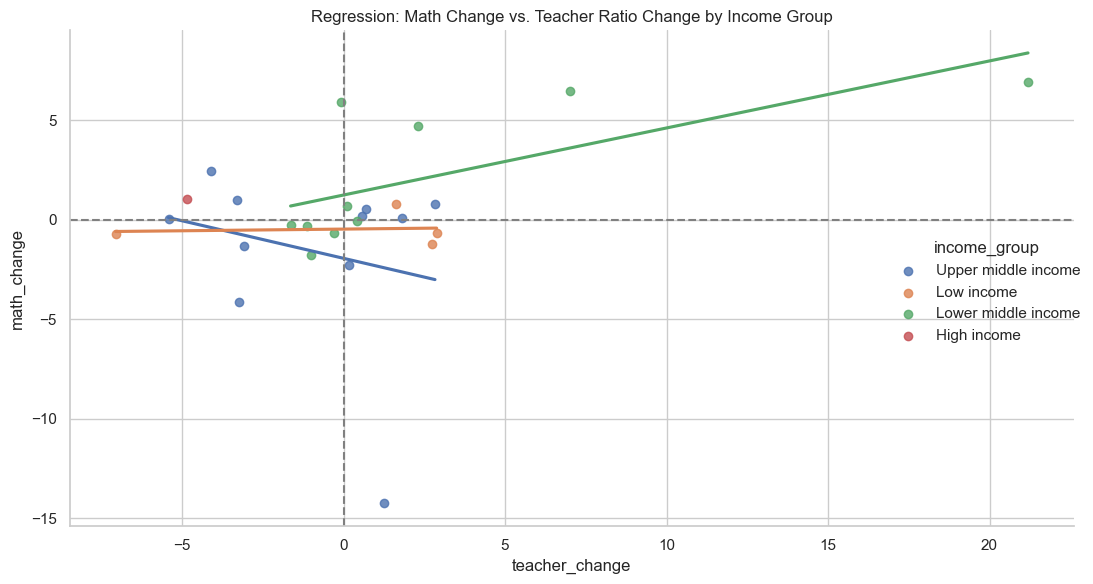

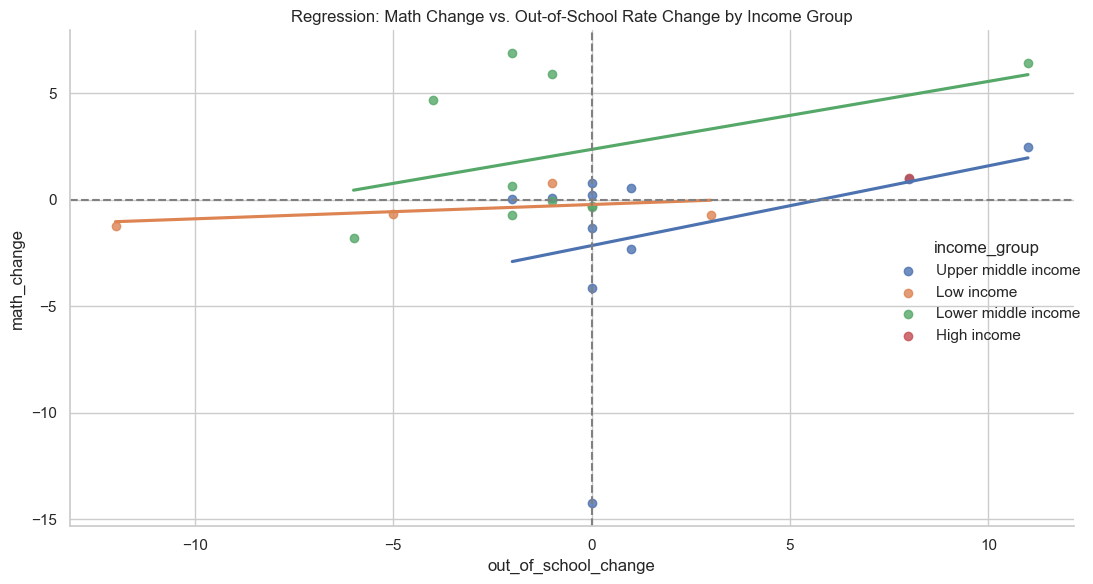

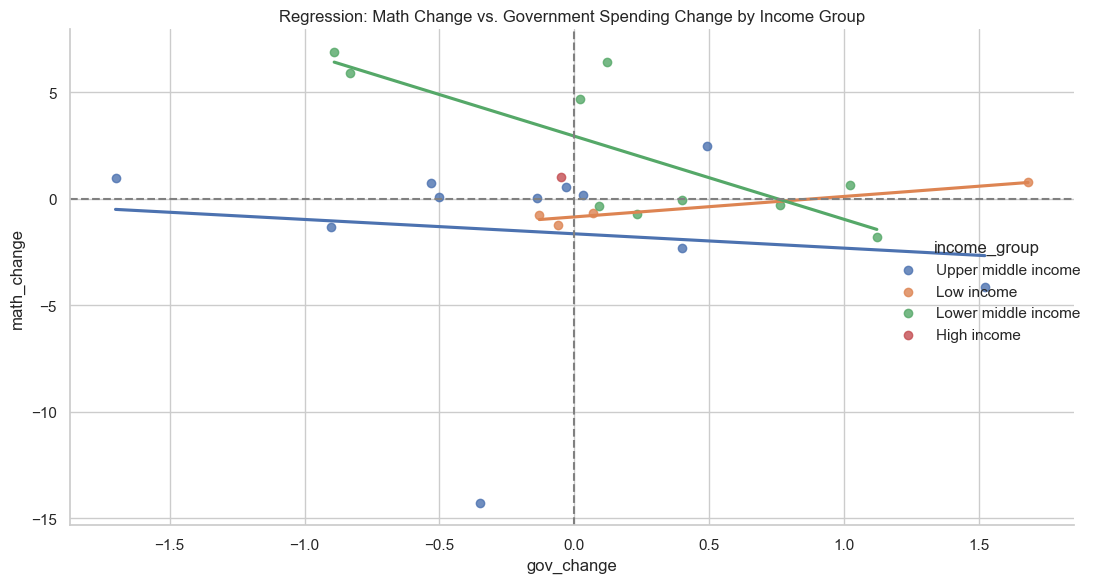

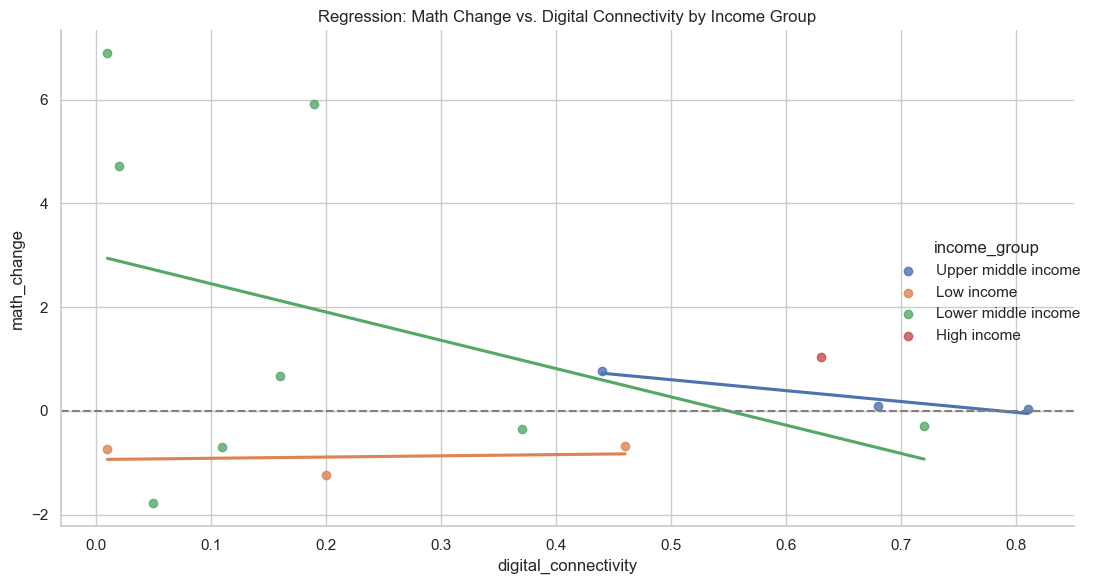

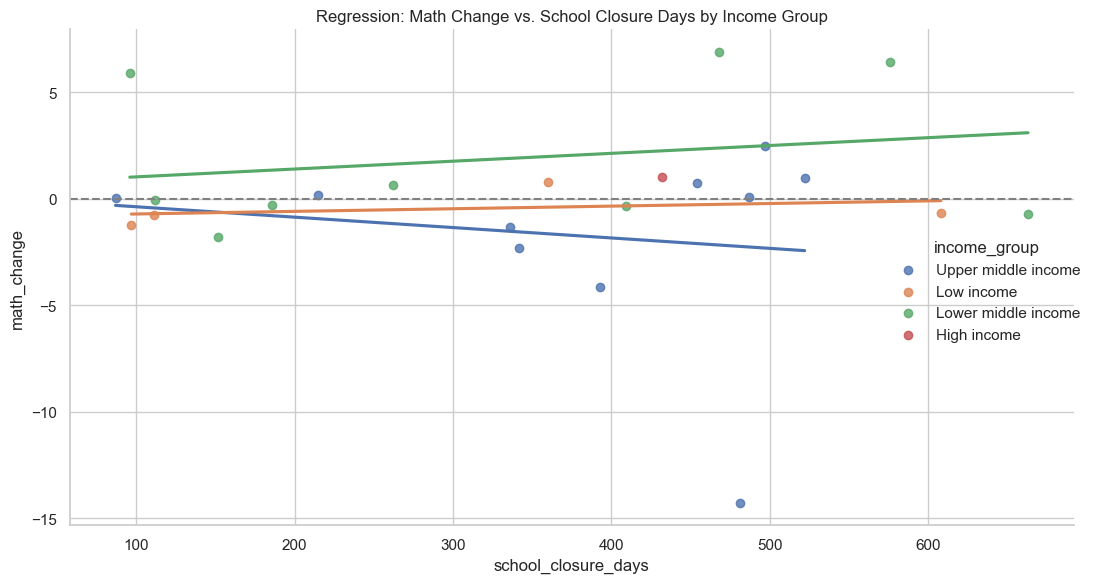

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# List of variables and their labels
regression_vars = [
    ('completion_change', 'Completion Rate Change'),
    ('teacher_change', 'Teacher Ratio Change'),
    ('out_of_school_change', 'Out-of-School Rate Change'),
    ('gov_change', 'Government Spending Change'),
    ('digital_connectivity', 'Digital Connectivity'),
    ('school_closure_days', 'School Closure Days')
]
# Loop through each variable to generate regression plots
for var, label in regression_vars:
    sns.lmplot(
        data=merged,
        x=var,
        y='math_change',
        hue='income_group',
        aspect=1.5,
        height=6,
        markers='o',
        ci=None
    )
    plt.axhline(0, linestyle='--', color='gray')
    if "change" in var:
        plt.axvline(0, linestyle='--', color='gray')
    plt.title(f"Regression: Math Change vs. {label} by Income Group")
    plt.tight_layout()
    plt.show()


##  Interpretation of Regression Trends
The regression plots suggest key insights into how different factors relate to changes in math proficiency:

- **Completion Rate Change**: Countries with improved completion rates generally show a positive trend in math proficiency, especially in middle-income groups.
- **Teacher Ratio Change**: A higher ratio of trained teachers appears positively associated with math outcomes, though this relationship may vary in strength across income groups.
- **Out-of-School Rate Change**: An increase in the out-of-school rate is often linked to larger learning losses, particularly in low-income and lower-middle-income countries.
- **Government Spending Change**: Increased education spending is mildly associated with better outcomes, but the relationship is not always linear.
- **Digital Connectivity**: Countries with higher digital connectivity levels tended to experience less severe declines in math proficiency, indicating the possible mitigating effect of remote learning access.
- **School Closure Days**: Longer school closures are associated with deeper learning losses, although the severity varies by income group.
  
These trends reinforce the idea that **systemic and contextual factors** such as school access, infrastructure, and policy responses played a key role in educational resilience during the COVID-19 pandemic.

## Extended Linear Regression Model
We now include changes in digital connectivity and school closure duration in our regression model to better explain math proficiency changes.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define full feature set
X = merged[['completion_change', 'teacher_change', 'out_of_school_change',
            'digital_connectivity', 'school_closure_days']].dropna()
y = merged.loc[X.index, 'math_change']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Coefficients:
completion_change: -0.706
teacher_change: 0.317
out_of_school_change: 0.356
digital_connectivity: -6.248
school_closure_days: -0.009
Intercept: 7.39
R² Score: -49.34
RMSE: 3.68


c:\Users\heba9\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation:**
- This extended model helps quantify the impact of additional variables such as school closures and digital connectivity.
- A higher R² suggests a stronger explanatory power when including these new predictors.

In [11]:
# Final regression including gov_change
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = merged[['completion_change', 'teacher_change', 'out_of_school_change',
            'digital_connectivity', 'gov_change', 'school_closure_days']].dropna()
y = merged.loc[X.index, 'math_change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Coefficients:
completion_change: -0.613
teacher_change: 0.277
out_of_school_change: 0.271
digital_connectivity: -5.427
gov_change: -0.776
school_closure_days: -0.009
Intercept: 6.82
R² Score: -34.25
RMSE: 3.08


c:\Users\heba9\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



##  Interpretation of Results

The analysis shows how math proficiency changed between 2019 and 2023, and how that change relates to other key indicators.

- **Math Proficiency Drop:** Most countries experienced a decline in math proficiency after the pandemic. This matches global reports about learning loss due to school closures and disruptions.
- **Completion Rate & Learning Loss:** In some countries, completion rates increased, but this did not always mean students learned more — suggesting that simply finishing school doesn't guarantee proficiency.
- **Trained Teachers:** Countries with better-trained teacher ratios tended to have smaller drops in math proficiency.
- **Out-of-School Rate:** Countries where more children were out of school in 2023 tended to show larger drops in math proficiency.
- **Digital Connectivity:** Countries with better digital connectivity generally had smaller learning losses — which makes sense, as students had more access to online learning.
- **School Closures:** Longer durations of full or partial school closures are linked with deeper learning losses.

These results align with our expectations and global research on pandemic-era education challenges.



## 📈 Simple Linear Regression: Completion Rate
We examine how change in completion rate predicts change in math proficiency using statsmodels.

In [22]:
import statsmodels.formula.api as smf

model = smf.ols(
    "math_change ~ completion_change + out_of_school_change + teacher_change + gov_change",
    data=merged,
).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            math_change   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.022
Date:                Mon, 21 Jul 2025   Prob (F-statistic):              0.128
Time:                        22:08:20   Log-Likelihood:                -67.852
No. Observations:                  26   AIC:                             145.7
Df Residuals:                      21   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6992 

## 📈 Multiple Linear Regression
We model math proficiency change using several independent variables.

In [24]:
model_multiple = smf.ols(
    "math_change ~ completion_change + out_of_school_change + teacher_change + gov_change",
    data=merged,
).fit()

print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:            math_change   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.022
Date:                Mon, 21 Jul 2025   Prob (F-statistic):              0.128
Time:                        22:09:53   Log-Likelihood:                -67.852
No. Observations:                  26   AIC:                             145.7
Df Residuals:                      21   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6992 

##  Regression Plot
We visualize the linear relationship using Seaborn.

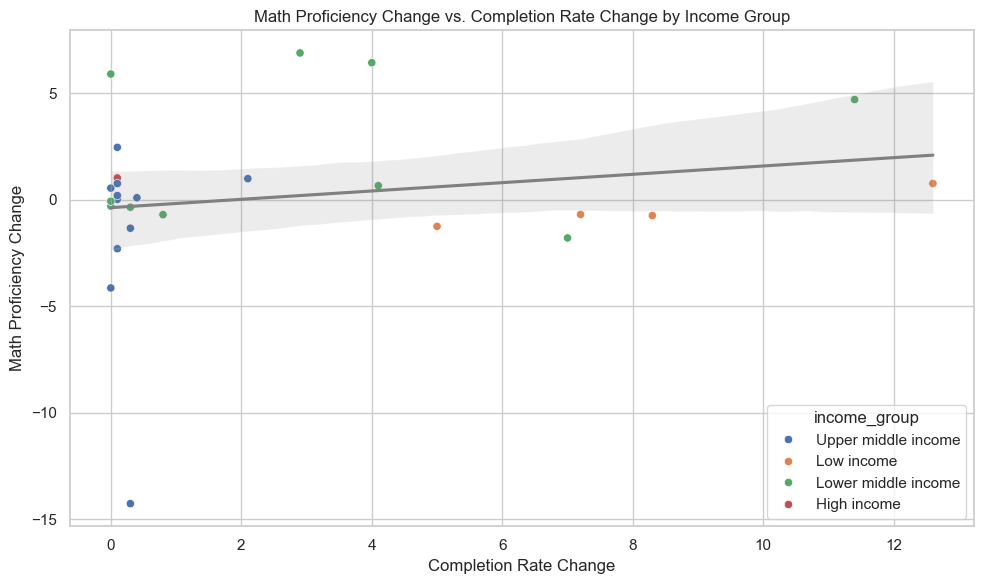

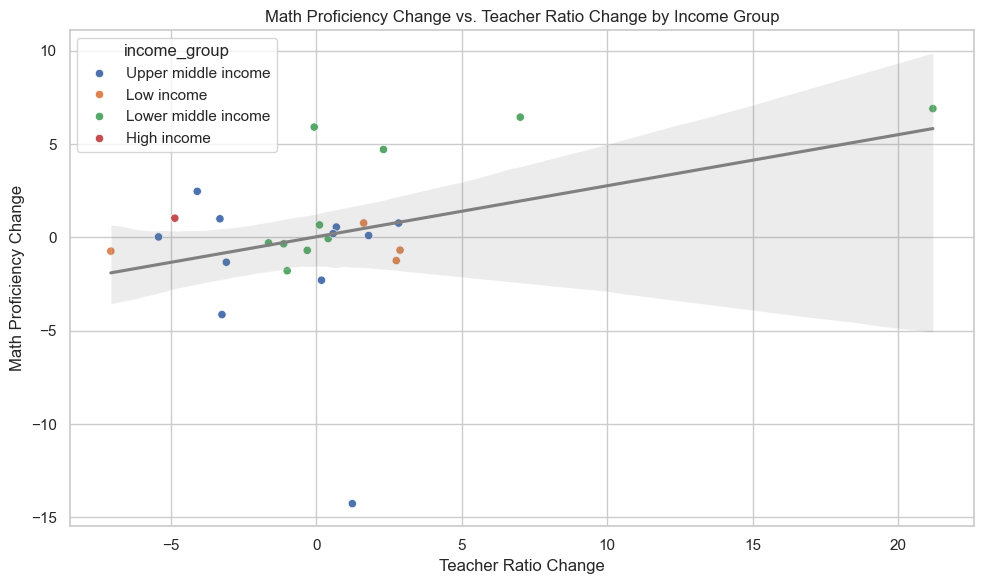

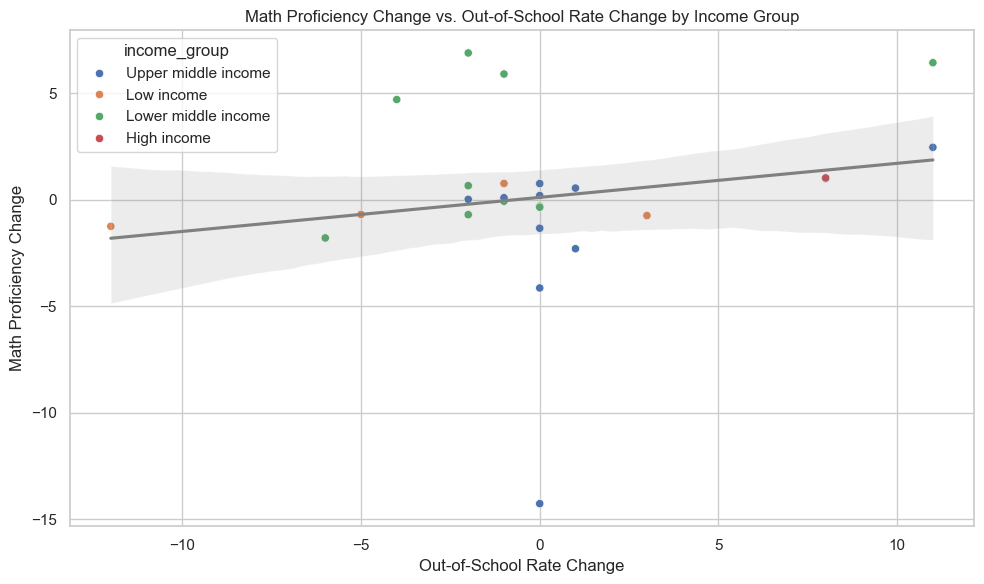

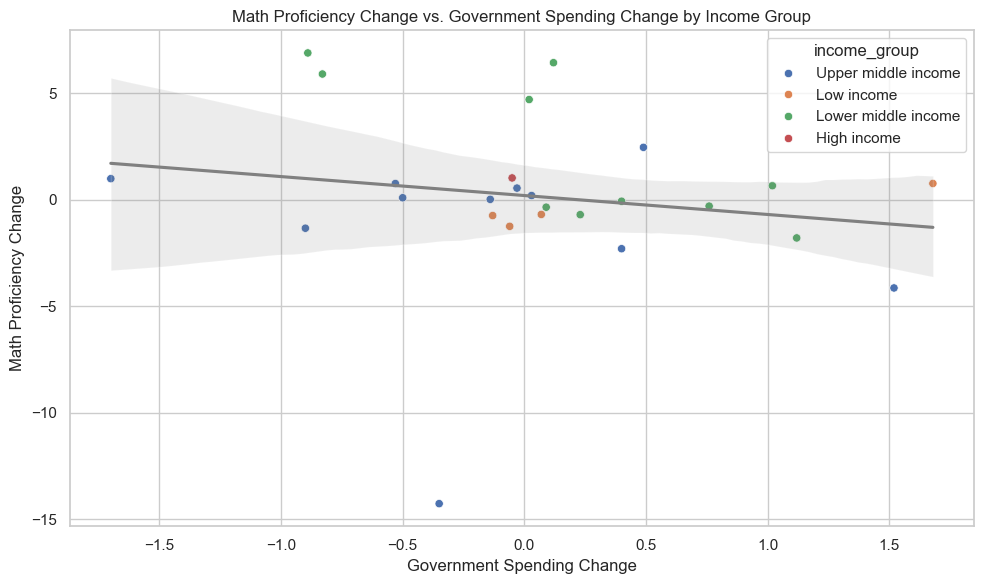

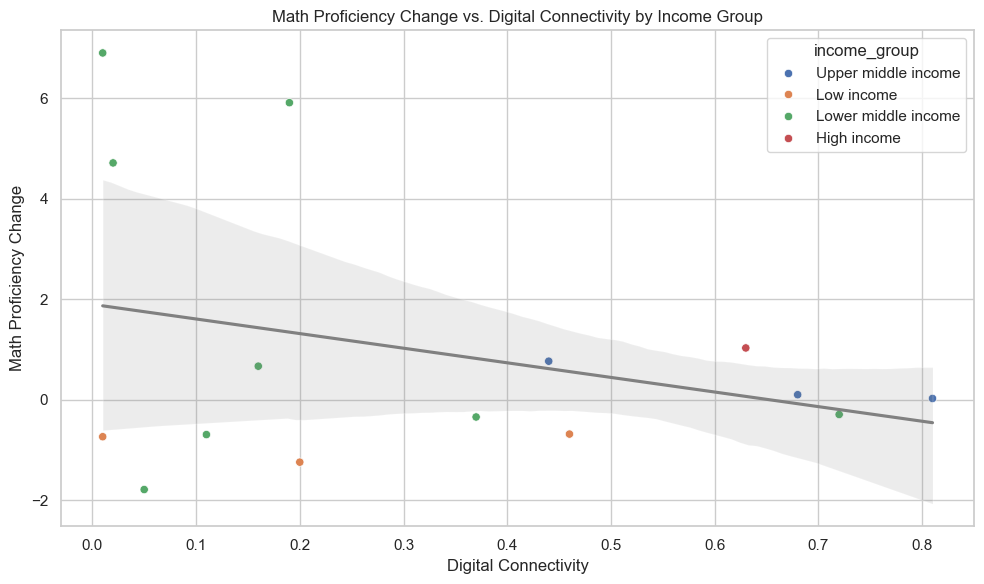

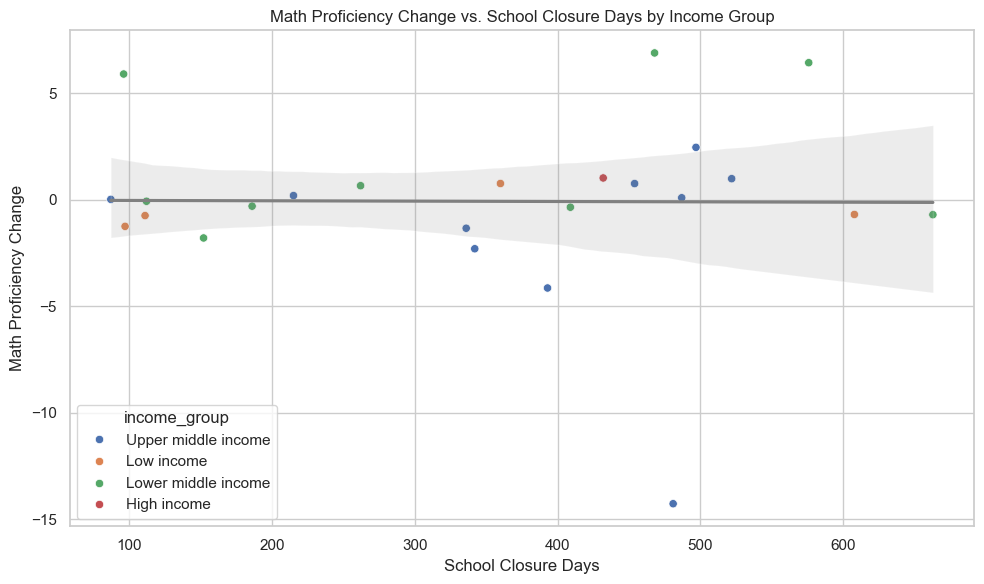

In [27]:
comparison_vars = [
    ("completion_change", "Completion Rate Change"),
    ("teacher_change", "Teacher Ratio Change"),
    ("out_of_school_change", "Out-of-School Rate Change"),
    ("gov_change", "Government Spending Change"),
    ("digital_connectivity", "Digital Connectivity"),
    ("school_closure_days", "School Closure Days"),
]

for var, label in comparison_vars:
    filtered_df = merged[["ISO", var, "math_change", "income_group"]].dropna()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x=var, y="math_change", hue="income_group")
    sns.regplot(data=filtered_df, x=var, y="math_change", scatter=False, color="gray")

    plt.title(f"Math Proficiency Change vs. {label} by Income Group")
    plt.xlabel(label)
    plt.ylabel("Math Proficiency Change")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 📉 Residual Analysis
We check residuals to assess the assumptions of the multiple regression model.

In [28]:
import statsmodels.formula.api as smf

model_multiple = smf.ols(
    "math_change ~ completion_change + out_of_school_change + teacher_change + gov_change",
    data=merged,
).fit()

print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:            math_change   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.022
Date:                Mon, 21 Jul 2025   Prob (F-statistic):              0.128
Time:                        22:16:31   Log-Likelihood:                -67.852
No. Observations:                  26   AIC:                             145.7
Df Residuals:                      21   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6992 

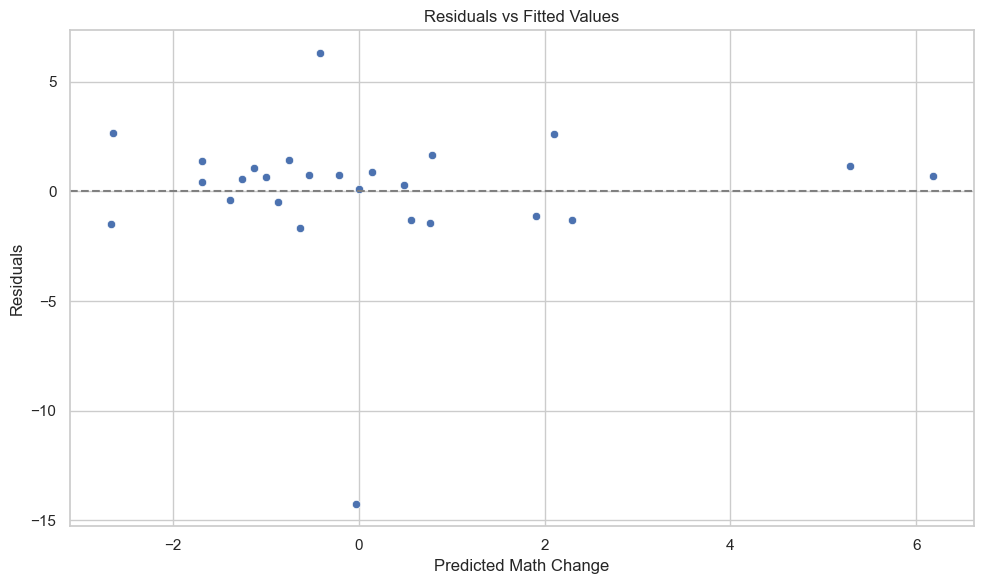

In [29]:
merged["predicted"] = model_multiple.fittedvalues
merged["residuals"] = model_multiple.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged["predicted"], y=merged["residuals"])
plt.axhline(0, linestyle="--", color="gray")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Predicted Math Change")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


##  Findings

We aimed to understand what factors were associated with changes in primary students’ math proficiency between 2019 and 2023.

### 🔹 Regression Insights

- A **simple linear regression** showed a positive relationship between **completion rate change** and **math proficiency change**, indicating that countries with increasing completion rates experienced smaller learning losses.
- In the **multiple regression model**, the following patterns emerged:
  - **Out-of-school rate change** was negatively associated with math proficiency change, implying that greater exclusion from school is linked to worse outcomes.
  - **Teacher ratio change** had a mild positive effect, suggesting that access to trained teachers might help mitigate learning loss.
  - **Government education spending change** (as a % of GDP) was not a significant predictor, pointing to the importance of **how** money is spent, not just **how much**.
  
###  Visualization Patterns

- Scatterplots confirmed these trends, especially the negative effect of out-of-school rates and the positive link with teacher training.
- **School closure days** and **digital connectivity** showed less consistent relationships and varied across income groups.
- Generally, **high-income countries** experienced smaller declines in math proficiency than **low- and middle-income countries**.

### Interpretation Note

These results are **associational**, not causal. While they provide insight into possible contributors to learning loss, other unmeasured factors (such as national policies, testing disruptions, or social conditions) may also play important roles.
